In [1]:
import sklearn
print(sklearn.__version__)

1.4.0


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
# data = pd.read_csv('C:\\Users\\91901\\Downloads\\PBLII-dataset.csv')  

data = pd.read_csv(r"C:\Users\vaide\Downloads\PBLII-dataset.csv")
columns = (['protocol_type','service','flag','logged_in','count','srv_serror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_serror_rate','dst_host_rerror_rate', 'target'])

In [3]:
data.columns = columns

In [4]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
data.head()

First few rows of the dataset:


protocol_type   service flag  logged_in  count  srv_serror_rate  \
0           tcp  ftp_data   S3          1      2              0.5   
1           tcp  ftp_data   SF          1      9              0.0   
2           udp   private   SF          0    243              0.0   
3          icmp     eco_i   SF          0      1              0.0   
4           tcp     imap4  REJ          0    267              0.0   

   srv_rerror_rate  same_srv_rate  diff_srv_rate  dst_host_count  \
0              0.0           1.00           0.00             255   
1              0.0           1.00           0.00             151   
2              0.0           1.00           0.00             255   
3              0.0           1.00           0.00               4   
4              1.0           0.04           0.06             255   

   dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                  96                    0.38                    0.10   
1                  30                    0.20                    0.03   
2                 255                    1.00                    0.00   
3                 108                    1.00                    0.00   
4                  12                    0.05                    0.07   

   dst_host_same_src_port_rate  dst_host_serror_rate  dst_host_rerror_rate  \
0                         0.45                  0.02                   0.0   
1                         0.20                  0.00                   0.0   
2                         0.86                  0.00                   0.0   
3                         1.00                  0.00                   0.0   
4                         0.00                  0.00                   1.0   

    target  
0   normal  
1   normal  
2   normal  
3  ipsweep  
4  neptune

In [5]:
# Summary statistics
print("\nSummary statistics:")
data.describe()


Summary statistics:


logged_in        count  srv_serror_rate  srv_rerror_rate  \
count  8019.000000  8019.000000      8019.000000      8019.000000   
mean      0.389076    83.884025         0.246451         0.150273   
std       0.487571   119.371715         0.427281         0.352374   
min       0.000000     1.000000         0.000000         0.000000   
25%       0.000000     2.000000         0.000000         0.000000   
50%       0.000000    12.000000         0.000000         0.000000   
75%       1.000000   142.000000         0.250000         0.000000   
max       1.000000   511.000000         1.000000         1.000000   

       same_srv_rate  diff_srv_rate  dst_host_count  dst_host_srv_count  \
count    8019.000000    8019.000000     8019.000000         8019.000000   
mean        0.675740       0.074935      186.662801          117.335079   
std         0.435626       0.210531       97.620896          110.715918   
min         0.000000       0.000000        1.000000            1.000000   
25%         0.100000       0.000000       95.000000           10.000000   
50%         1.000000       0.000000      255.000000           66.000000   
75%         1.000000       0.060000      255.000000          255.000000   
max         1.000000       1.000000      255.000000          255.000000   

       dst_host_same_srv_rate  dst_host_diff_srv_rate  \
count             8019.000000             8019.000000   
mean                 0.528688                0.087705   
std                  0.446989                0.198850   
min                  0.000000                0.000000   
25%                  0.050000                0.000000   
50%                  0.560000                0.020000   
75%                  1.000000                0.070000   
max                  1.000000                1.000000   

       dst_host_same_src_port_rate  dst_host_serror_rate  dst_host_rerror_rate  
count                  8019.000000           8019.000000           8019.000000  
mean                      0.151354              0.247804              0.145637  
std                       0.317975              0.421634              0.329702  
min                       0.000000              0.000000              0.000000  
25%                       0.000000              0.000000              0.000000  
50%                       0.000000              0.000000              0.000000  
75%                       0.050000              0.330000              0.000000  
max                       1.000000              1.000000              1.000000

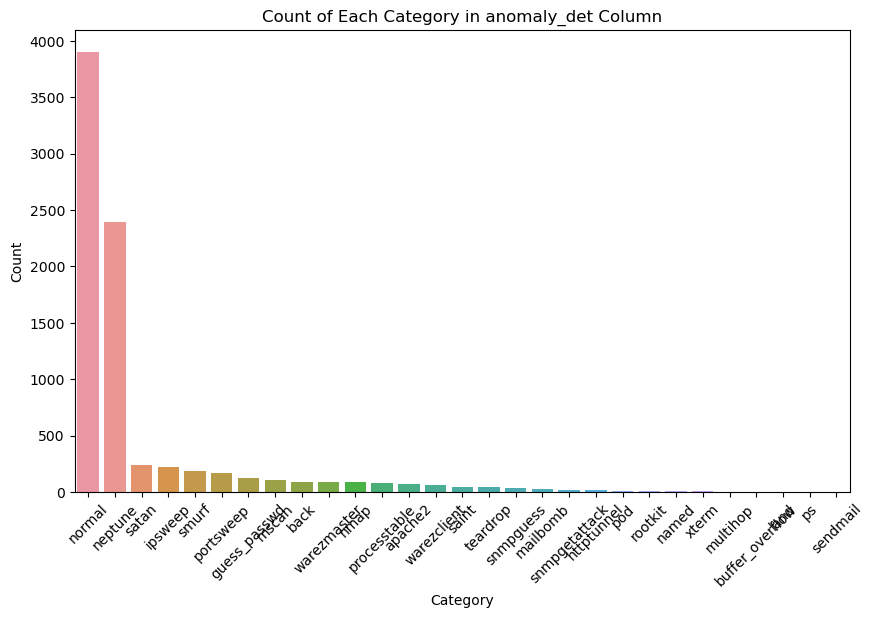

In [6]:
# Count the occurrences of each category in the 'anomaly_det' column
count_series = data['target'].value_counts()

# Create a count plot using seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='target', order=count_series.index)
plt.title('Count of Each Category in anomaly_det Column')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [7]:
# # Count the occurrences of each category in the 'anomaly_det' column
# count_series = data['anomaly_det'].value_counts()

# # Print the count of each category
# print(count_series)

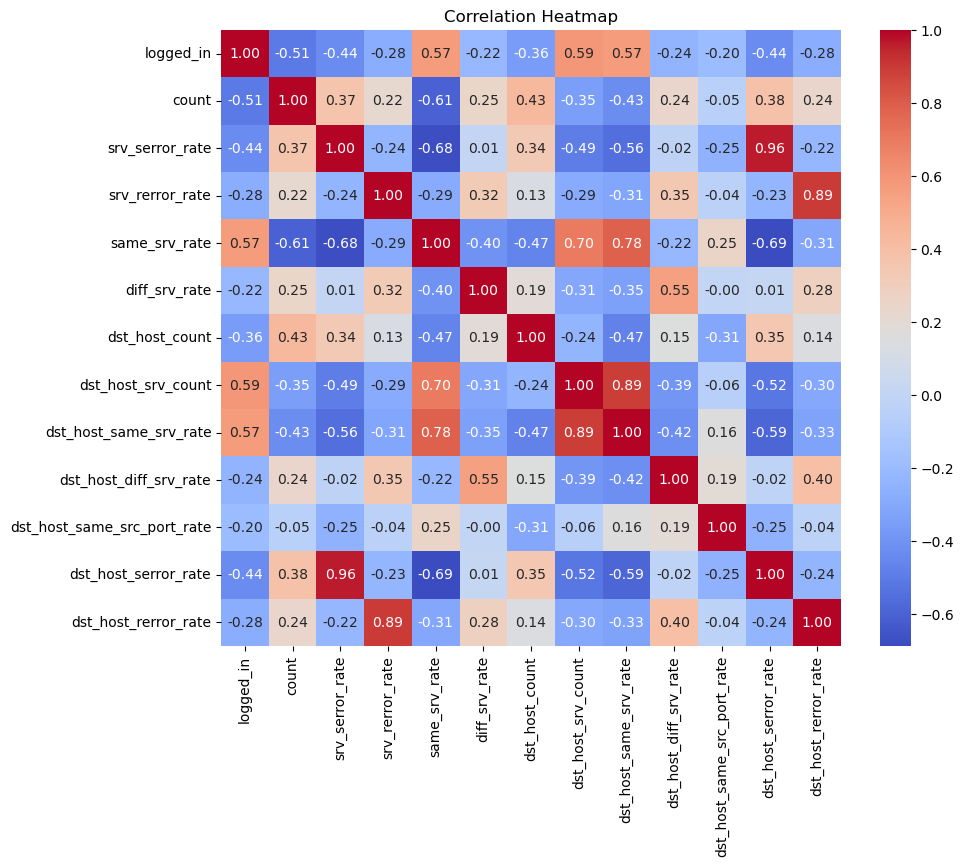

In [8]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

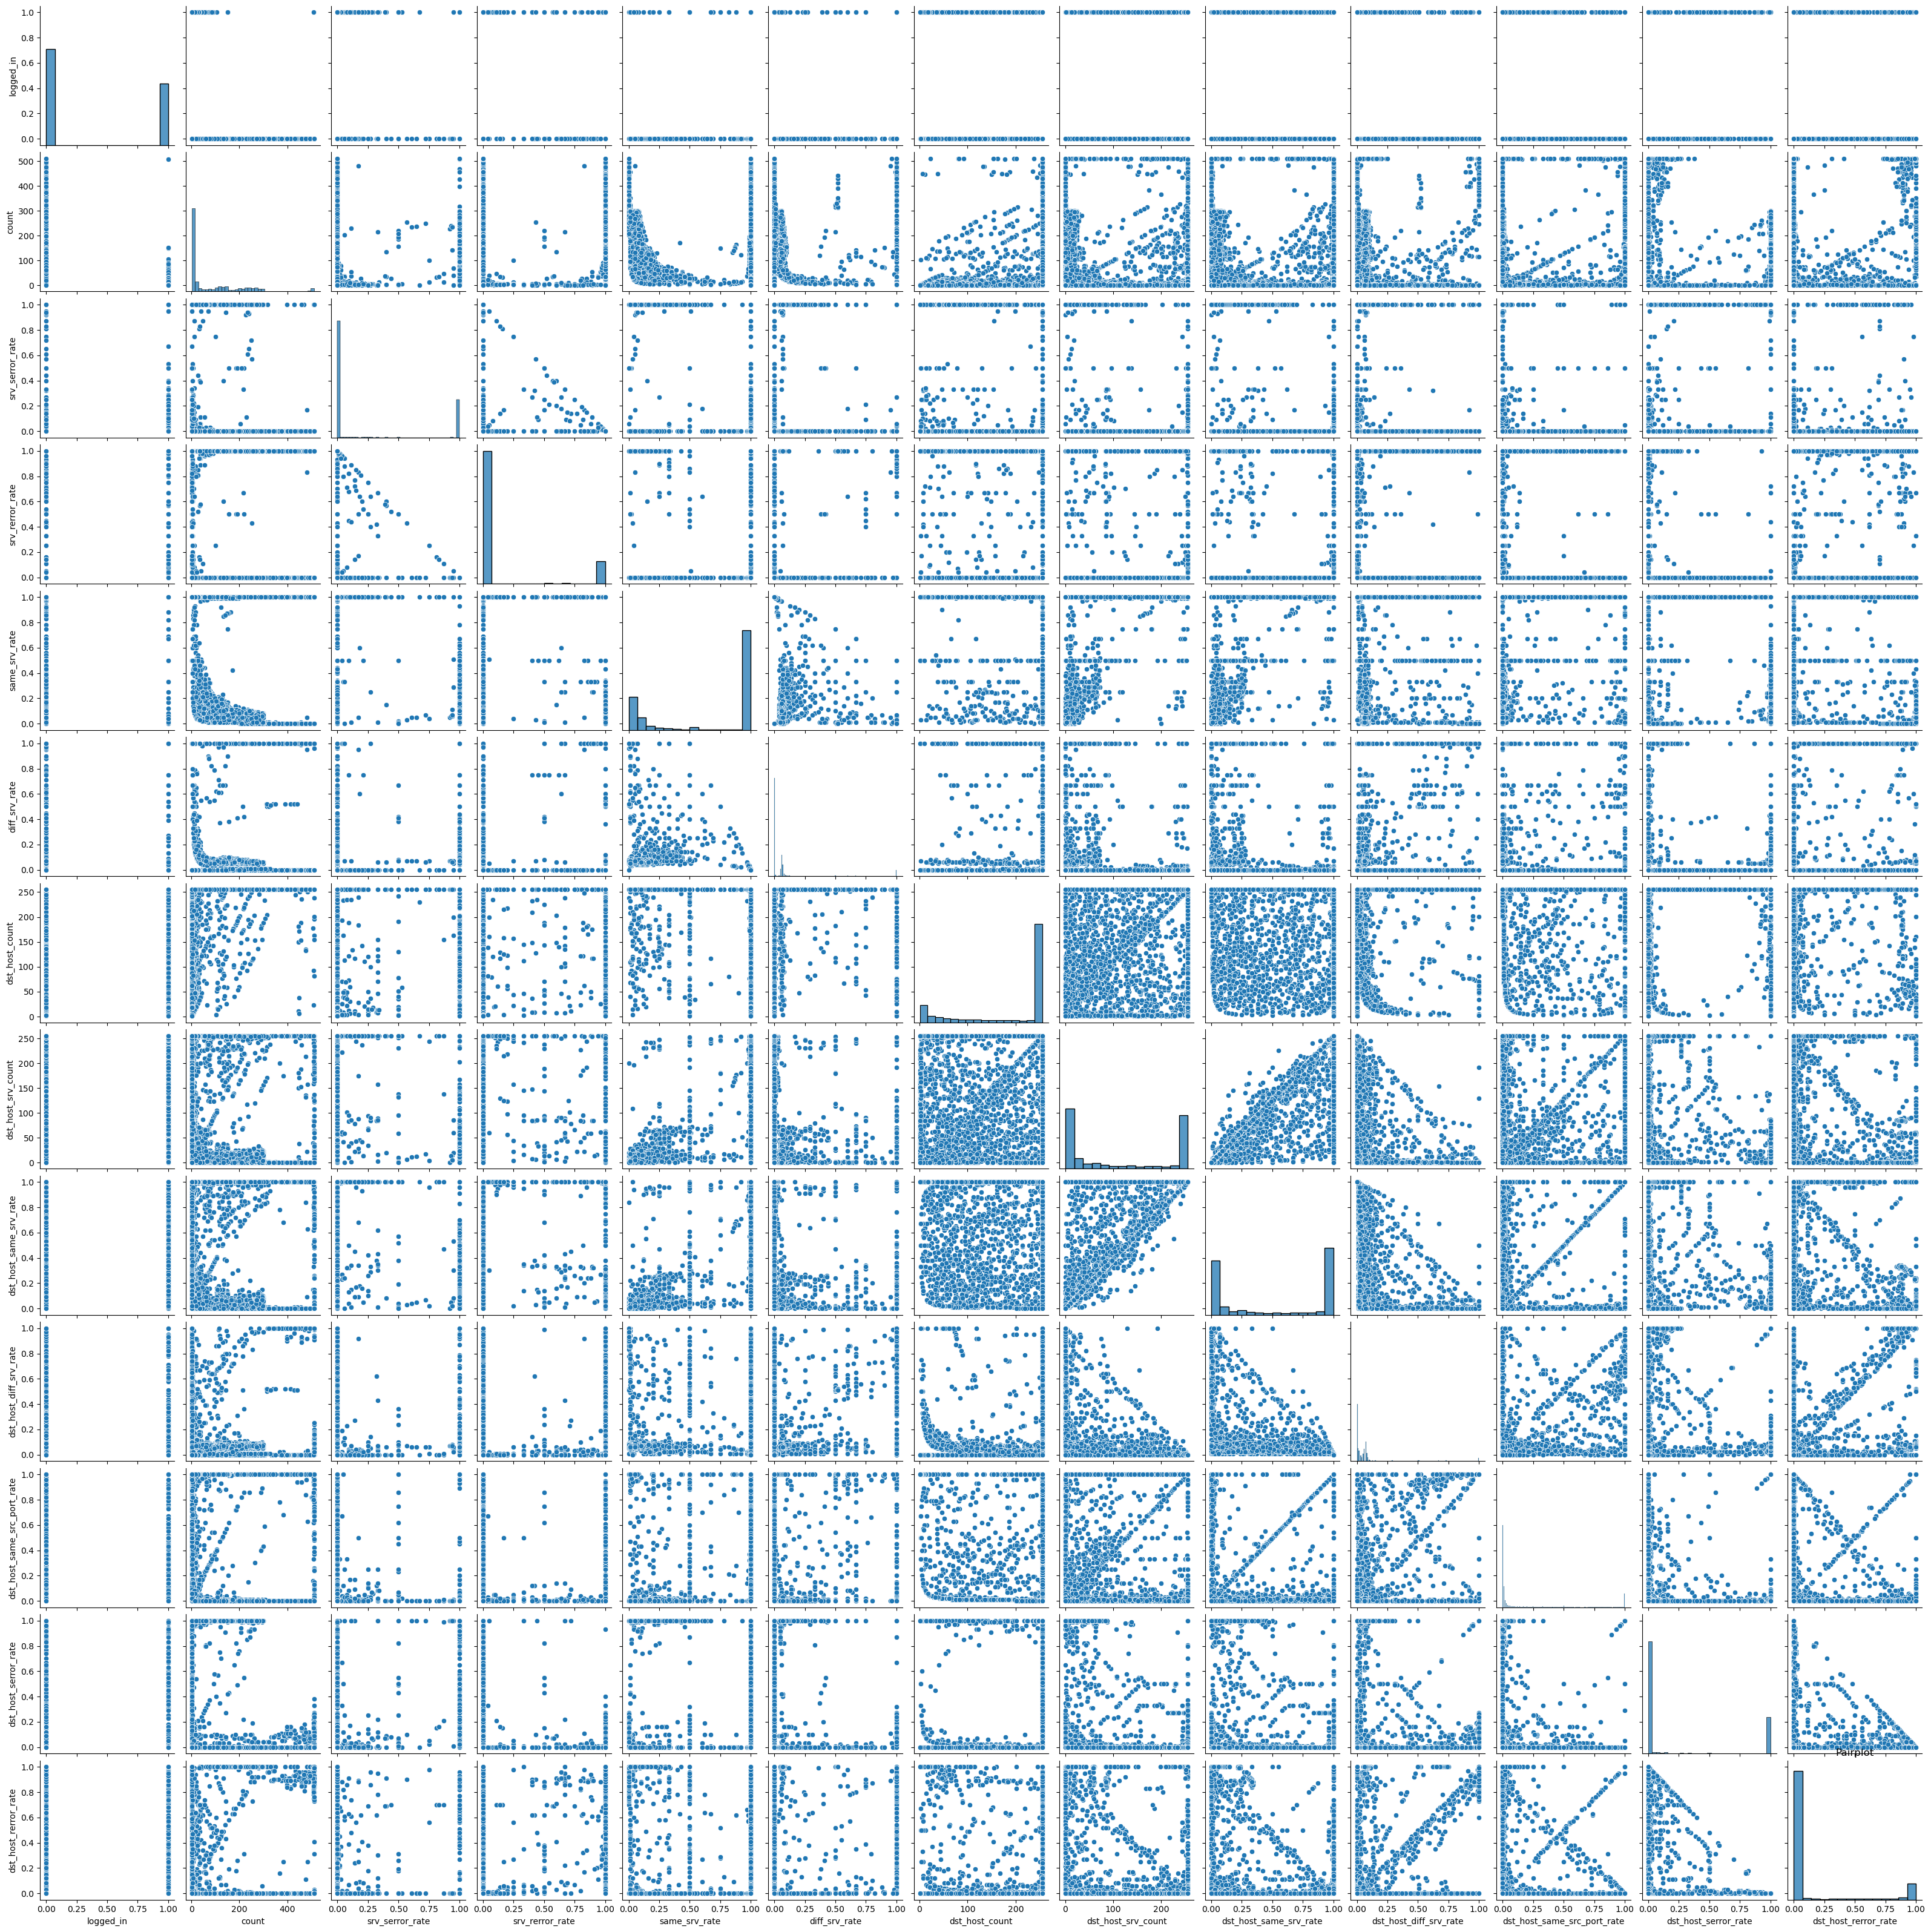

In [9]:
# Pairplot
sns.pairplot(data)
plt.title('Pairplot')
plt.show()

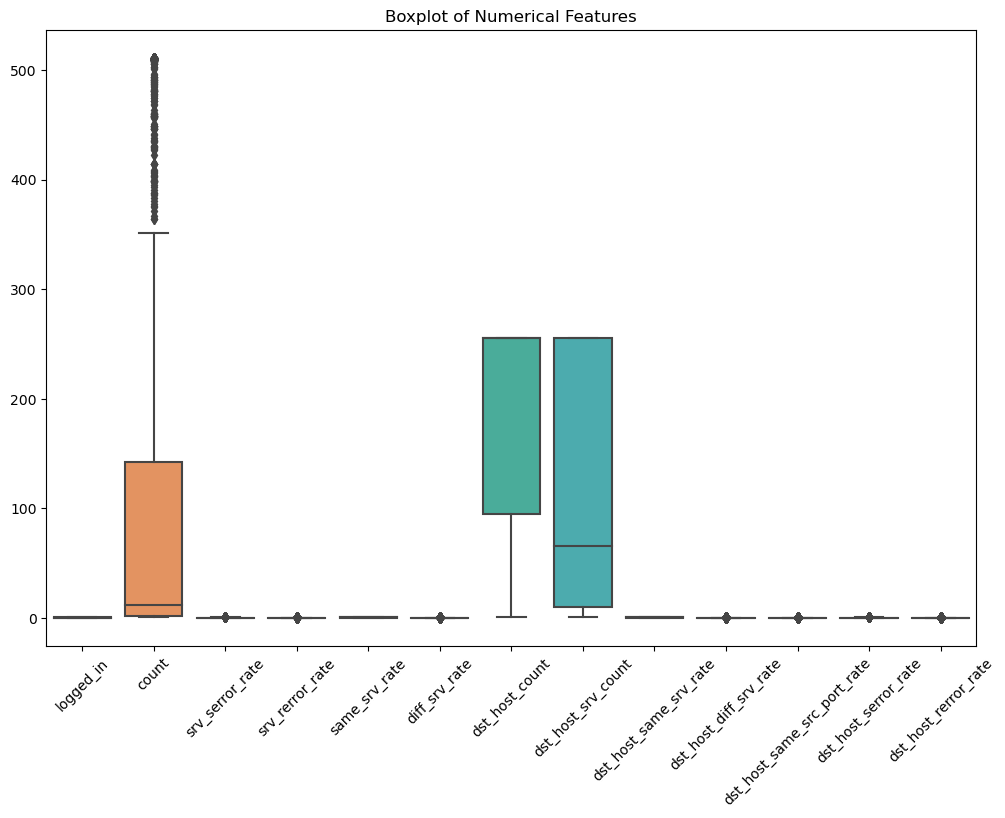

In [10]:
# Boxplot for numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=data.drop(columns=['target']))
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

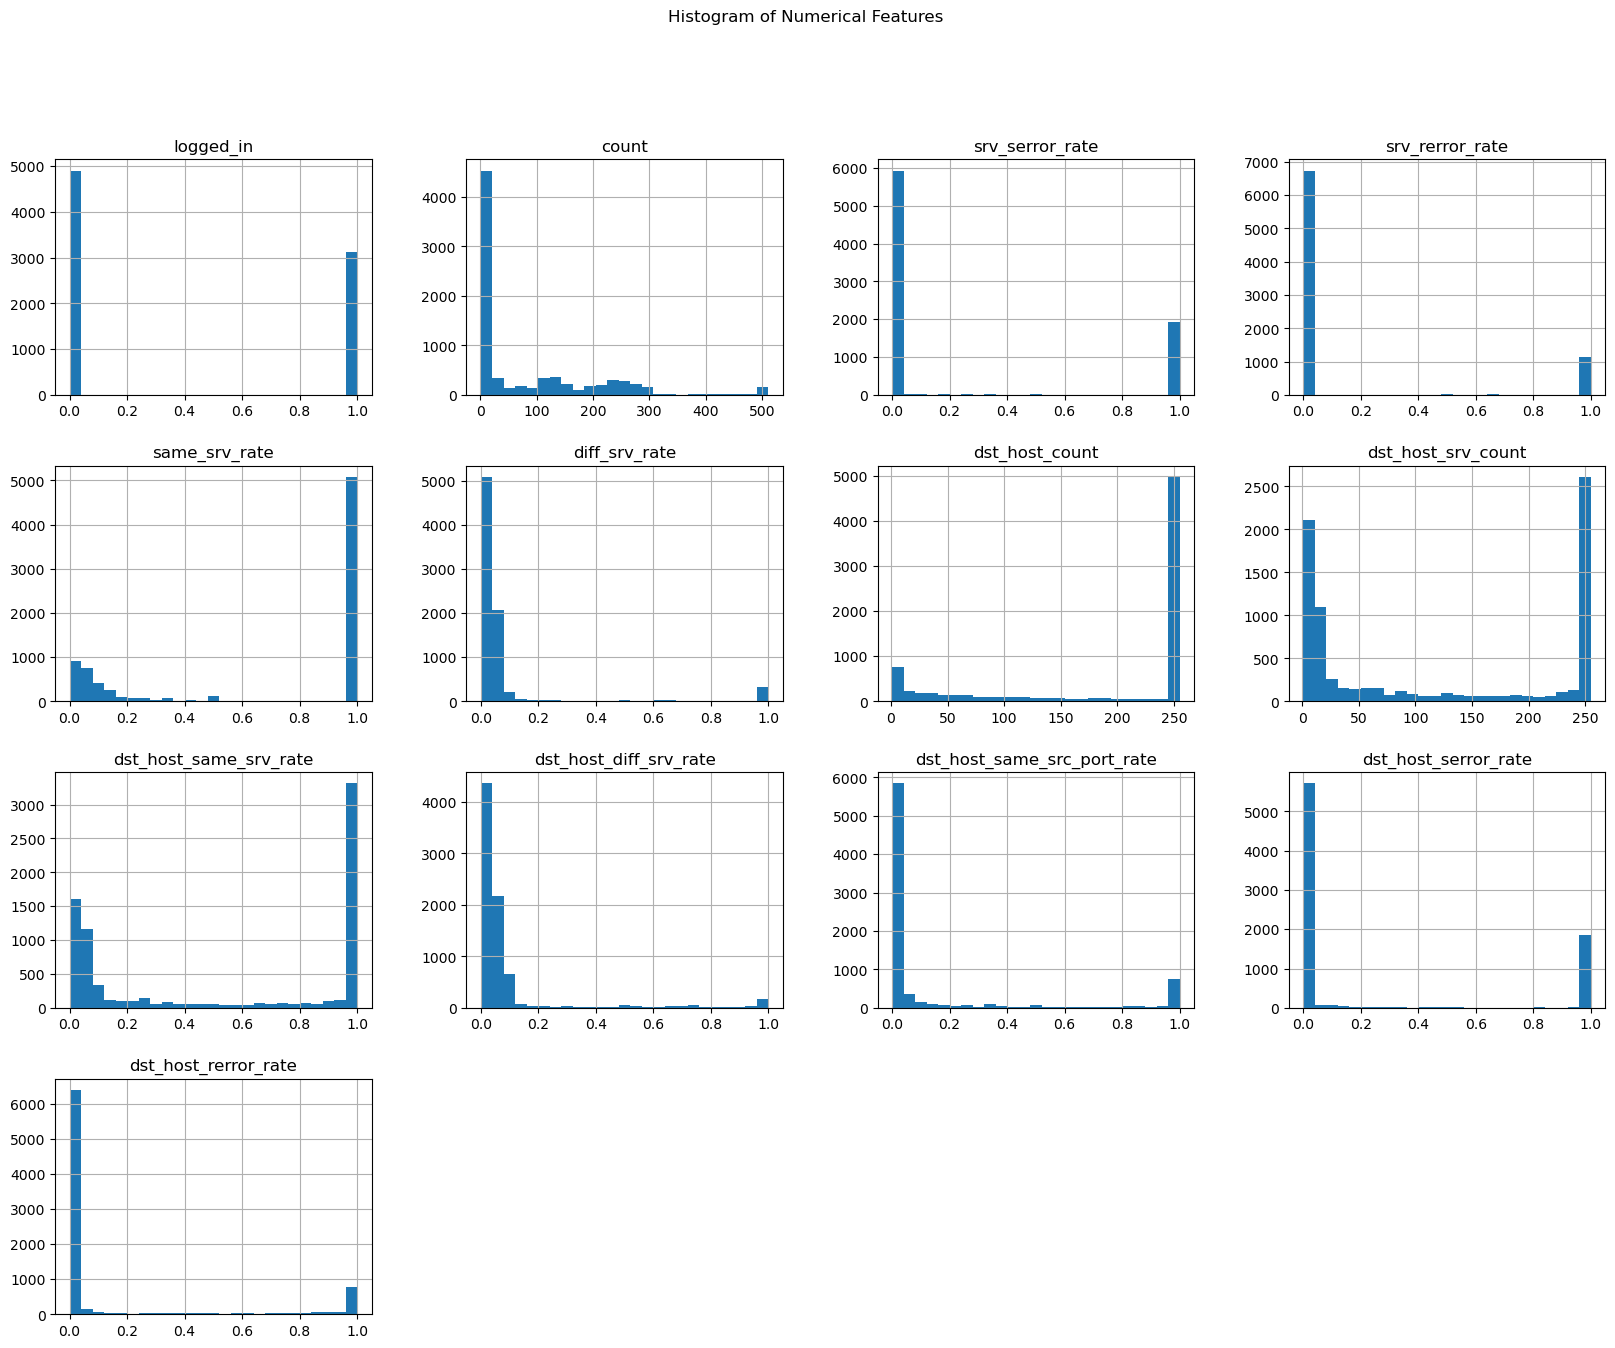

In [11]:
# Histogram for numerical features
data.select_dtypes(include=['int64', 'float64']).hist(figsize=(20, 15), bins=25)
plt.suptitle('Histogram of Numerical Features')
plt.show()

### Random Forest Classifier

In [12]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
# data = pd.read_csv('C:\\Users\\91901\\Downloads\\PBLII-dataset.csv') 


# Separate features and target variable
X = data.iloc[:, :-1]  # Features (all columns except the last one)
y = data.iloc[:, -1]   # Target variable (last column)

# Convert categorical variables into numerical using LabelEncoder
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(x_test)

# Evaluate the classifier
report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

# Calculate accuracy separately
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:")
for attack_type, metrics in report.items():
    print(f"\nAttack Type: {attack_type}")
    if isinstance(metrics, dict):
        print(f"Precision: {metrics['precision']:.2f}")
        print(f"Recall: {metrics['recall']:.2f}")
        print(f"F1 Score: {metrics['f1-score']:.2f}")
    else:
        print("Precision: 0.00")
        print("Recall: 0.00")
        print("F1 Score: 0.00")

Accuracy: 0.9569825436408977

Classification Report:

Attack Type: apache2
Precision: 1.00
Recall: 0.91
F1 Score: 0.95

Attack Type: back
Precision: 0.78
Recall: 1.00
F1 Score: 0.88

Attack Type: buffer_overflow
Precision: 0.00
Recall: 0.00
F1 Score: 0.00

Attack Type: guess_passwd
Precision: 1.00
Recall: 0.91
F1 Score: 0.95

Attack Type: httptunnel
Precision: 0.50
Recall: 1.00
F1 Score: 0.67

Attack Type: ipsweep
Precision: 0.85
Recall: 0.73
F1 Score: 0.79

Attack Type: land
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Attack Type: mailbomb
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Attack Type: mscan
Precision: 1.00
Recall: 0.87
F1 Score: 0.93

Attack Type: named
Precision: 0.00
Recall: 0.00
F1 Score: 0.00

Attack Type: neptune
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Attack Type: nmap
Precision: 0.38
Recall: 0.46
F1 Score: 0.41

Attack Type: normal
Precision: 0.97
Recall: 0.98
F1 Score: 0.98

Attack Type: pod
Precision: 0.00
Recall: 0.00
F1 Score: 0.00

Attack Type: portsweep


In [13]:
# # Check the columns of the encoded dataset
print(data.columns)

Index(['protocol_type', 'service', 'flag', 'logged_in', 'count',
       'srv_serror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_serror_rate', 'dst_host_rerror_rate', 'target'],
      dtype='object')


In [14]:
#Save model

In [28]:
import joblib
joblib.dump(rf_classifier,r'C:\Users\vaide\Project_ads\myproject\static/random_forest.pkl')

['C:\\Users\\vaide\\Project_ads\\myproject\\static/random_forest.pkl']

In [16]:
# # Import necessary libraries
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, accuracy_score
# from sklearn.preprocessing import OneHotEncoder

# # Drop any rows with missing values
# data.dropna(inplace=True)

# # Separate features and target variable
# X = data.drop(columns=['target'])  # Features (all columns except the target variable)
# y = data['target']  # Target variable

# # One-hot encode categorical variables
# X_encoded = pd.get_dummies(X)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# # Initialize the Random Forest classifier
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# # Train the classifier
# rf_classifier.fit(X_train, y_train)

# # Predict on the test set
# y_pred = rf_classifier.predict(X_test)

# # Evaluate the classifier
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)

# print("Accuracy:", accuracy*100)
# print("\nClassification Report:")
# for attack_type, metrics in report.items():
#     if isinstance(metrics, dict):  # Check if metrics is a dictionary
#         print(f"\nAttack Type: {attack_type}")
#         print(f"Precision: {metrics['precision']:.2f}")
#         print(f"Recall: {metrics['recall']:.2f}")
#         print(f"F1 Score: {metrics['f1-score']:.2f}")


### Decision Tree Classifier

In [17]:
# data1 = {
#     'protocol_type' :'tcp', 'service':'ftp_data', 'flag':'S3', 'logged_in':1, 'count':2,
#        'srv_serror_rate':0.5, 'srv_rerror_rate':0.0, 'same_srv_rate':1.00, 'diff_srv_rate':0.00,
#        'dst_host_count':255, 'dst_host_srv_count':96, 'dst_host_same_srv_rate':0.38,
#        'dst_host_diff_srv_rate':0.10, 'dst_host_same_src_port_rate':0.45,
#        'dst_host_serror_rate':0.02, 'dst_host_rerror_rate':0.0,'target':13    
# }

# new_data= pd.DataFrame(data1,index=[0])
# pred = rf_classifier.predict(new_data)
# print(pred[0])

In [18]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import classification_report, accuracy_score
# from sklearn.preprocessing import LabelEncoder

# # Drop any rows with missing values
# data.dropna(inplace=True)

# # Encode categorical variables
# label_encoder = LabelEncoder()
# for column in data.columns:
#     if data[column].dtype == 'object':
#         data[column] = label_encoder.fit_transform(data[column])

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize the Decision Tree classifier
# dt_classifier = DecisionTreeClassifier(random_state=42)

# dt_classifier.fit(X_train, y_train)

# # Predict on the test set
# y_pred = dt_classifier.predict(X_test)

# # Evaluate the classifier
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)  # Set zero_division=0

# print("Accuracy:", accuracy)
# print("\nClassification Report:")
# for attack_type, metrics in report.items():
#     if isinstance(metrics, dict):  # Check if metrics is a dictionary
#         print(f"\nAttack Type: {attack_type}")
#         print(f"Precision: {metrics['precision']:.2f}")
#         print(f"Recall: {metrics['recall']:.2f}")
#         print(f"F1 Score: {metrics['f1-score']:.2f}")


### MLP Model

In [19]:
# from sklearn.preprocessing import LabelEncoder

# X = data.drop(columns=['target'])  
# y = data['target']  

# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)

In [20]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import classification_report, accuracy_score

# data.dropna(inplace=True)

# X = data.drop(columns=['target'])  
# y = data['target']  

# X_encoded = pd.get_dummies(X)

# mlp_classifier = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=100)

# mlp_classifier.fit(x_train, y_train)

# y_pred = mlp_classifier.predict(x_test)

# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)

# print("Accuracy:", accuracy*100)
# print("\nClassification Report:")
# for attack_type, metrics in report.items():
#     print(f"\nAttack Type: {attack_type}")
#     if isinstance(metrics, dict):
#         print(f"Precision: {metrics['precision']:.2f}")
#         print(f"Recall: {metrics['recall']:.2f}")
#         print(f"F1 Score: {metrics['f1-score']:.2f}")
#     else:
#         print("Precision: 0.00")
#         print("Recall: 0.00")
#         print("F1 Score: 0.00")

### LSTM Model

In [21]:
# import numpy as np

# elements_per_row = 16

# x_train = np.reshape(x_train, (x_train.shape[0], elements_per_row))
# x_test = np.reshape(x_test, (x_test.shape[0], elements_per_row))

In [22]:
# from keras.models import Sequential
# from keras.layers import LSTM, Dense

# lstm_model = Sequential()

# lstm_model.add(LSTM(units=128, input_shape=(x_train.shape[1], 1)))

# lstm_model.add(Dense(1, activation='sigmoid'))  

# lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# history = lstm_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

In [23]:
# loss, accuracy = lstm_model.evaluate(x_test, y_test)
# print('Accuracy:', accuracy*100)
# print("\nClassification Report:")
# for attack_type, metrics in report.items():
#     print(f"\nAttack Type: {attack_type}")
#     if isinstance(metrics, dict):
#         print(f"Precision: {metrics['precision']:.2f}")
#         print(f"Recall: {metrics['recall']:.2f}")
#         print(f"F1 Score: {metrics['f1-score']:.2f}")
#     else:
#         print("Precision: 0.00")
#         print("Recall: 0.00")
#         print("F1 Score: 0.00")